In [2]:
import pandas as pd

vehicles = pd.read_csv('./data/vehicles.csv')

In [3]:
# Basic info about odometer column
print("Odometer Column Analysis")
print("=" * 60)
print(f"Total records: {len(vehicles)}")
print(f"Missing values: {vehicles['odometer'].isna().sum()}")
print(f"Non-null values: {vehicles['odometer'].notna().sum()}")
print("\nBasic Statistics:")
print(vehicles['odometer'].describe())

Odometer Column Analysis
Total records: 426880
Missing values: 4400
Non-null values: 422480

Basic Statistics:
count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64


In [4]:
import numpy as np

# Remove missing values for outlier analysis
odometer_clean = vehicles['odometer'].dropna()

print("=" * 60)
print("METHOD 1: IQR (Interquartile Range) Method")
print("=" * 60)

# Calculate IQR
Q1 = odometer_clean.quantile(0.25)
Q3 = odometer_clean.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = odometer_clean[(odometer_clean < lower_bound) | (odometer_clean > upper_bound)]

print(f"Q1 (25th percentile): {Q1:,.0f} miles")
print(f"Q3 (75th percentile): {Q3:,.0f} miles")
print(f"IQR: {IQR:,.0f} miles")
print(f"\nOutlier boundaries:")
print(f"  Lower bound: {lower_bound:,.0f} miles")
print(f"  Upper bound: {upper_bound:,.0f} miles")
print(f"\nNumber of outliers: {len(outliers_iqr):,} ({len(outliers_iqr)/len(odometer_clean)*100:.2f}%)")
print(f"  - Below lower bound: {(odometer_clean < lower_bound).sum():,}")
print(f"  - Above upper bound: {(odometer_clean > upper_bound).sum():,}")


METHOD 1: IQR (Interquartile Range) Method
Q1 (25th percentile): 37,704 miles
Q3 (75th percentile): 133,542 miles
IQR: 95,838 miles

Outlier boundaries:
  Lower bound: -106,054 miles
  Upper bound: 277,300 miles

Number of outliers: 4,385 (1.04%)
  - Below lower bound: 0
  - Above upper bound: 4,385


In [5]:
from scipy import stats

print("=" * 60)
print("METHOD 2: Z-Score Method")
print("=" * 60)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(odometer_clean))

# Threshold: typically 3 standard deviations
threshold = 3

# Identify outliers
outliers_zscore = odometer_clean[z_scores > threshold]

print(f"Z-score threshold: {threshold}")
print(f"Number of outliers: {len(outliers_zscore):,} ({len(outliers_zscore)/len(odometer_clean)*100:.2f}%)")

# Show some statistics about the outliers
if len(outliers_zscore) > 0:
    print(f"\nOutlier statistics:")
    print(f"  Min outlier value: {outliers_zscore.min():,.0f} miles")
    print(f"  Max outlier value: {outliers_zscore.max():,.0f} miles")
    print(f"  Mean of outliers: {outliers_zscore.mean():,.0f} miles")


METHOD 2: Z-Score Method
Z-score threshold: 3
Number of outliers: 1,089 (0.26%)

Outlier statistics:
  Min outlier value: 740,000 miles
  Max outlier value: 10,000,000 miles
  Mean of outliers: 2,577,341 miles


In [6]:
print("=" * 60)
print("METHOD 3: Percentile Method")
print("=" * 60)

# Define percentile thresholds
lower_percentile = 1
upper_percentile = 99

lower_threshold = odometer_clean.quantile(lower_percentile / 100)
upper_threshold = odometer_clean.quantile(upper_percentile / 100)

# Identify outliers
outliers_percentile = odometer_clean[(odometer_clean < lower_threshold) | (odometer_clean > upper_threshold)]

print(f"Lower threshold ({lower_percentile}th percentile): {lower_threshold:,.0f} miles")
print(f"Upper threshold ({upper_percentile}th percentile): {upper_threshold:,.0f} miles")
print(f"\nNumber of outliers: {len(outliers_percentile):,} ({len(outliers_percentile)/len(odometer_clean)*100:.2f}%)")
print(f"  - Below {lower_percentile}th percentile: {(odometer_clean < lower_threshold).sum():,}")
print(f"  - Above {upper_percentile}th percentile: {(odometer_clean > upper_threshold).sum():,}")


METHOD 3: Percentile Method
Lower threshold (1th percentile): 2 miles
Upper threshold (99th percentile): 280,000 miles

Number of outliers: 8,377 (1.98%)
  - Below 1th percentile: 4,211
  - Above 99th percentile: 4,166


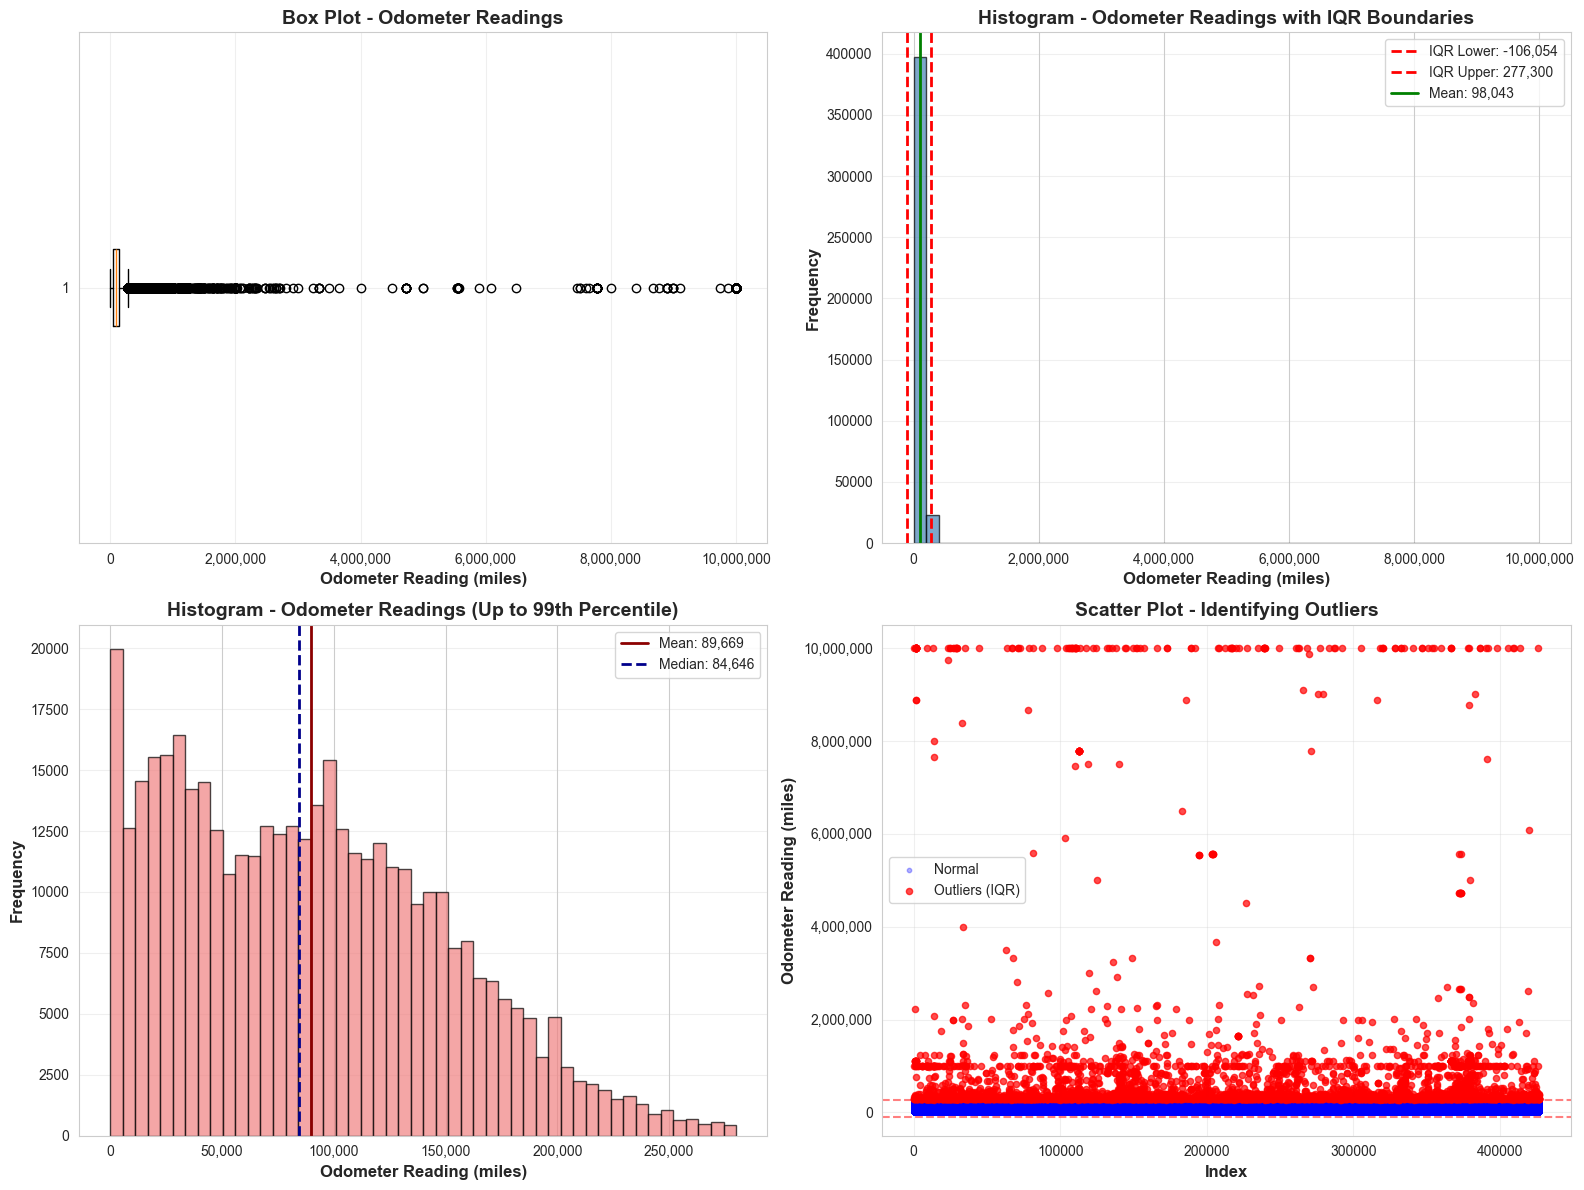

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot
ax1 = axes[0, 0]
ax1.boxplot(odometer_clean, vert=False)
ax1.set_xlabel('Odometer Reading (miles)', fontsize=12, fontweight='bold')
ax1.set_title('Box Plot - Odometer Readings', fontsize=14, fontweight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax1.grid(True, alpha=0.3)

# 2. Histogram with outliers marked
ax2 = axes[0, 1]
ax2.hist(odometer_clean, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax2.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'IQR Lower: {lower_bound:,.0f}')
ax2.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'IQR Upper: {upper_bound:,.0f}')
ax2.axvline(odometer_clean.mean(), color='green', linestyle='-', linewidth=2, label=f'Mean: {odometer_clean.mean():,.0f}')
ax2.set_xlabel('Odometer Reading (miles)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Histogram - Odometer Readings with IQR Boundaries', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 3. Histogram (zoomed in, excluding extreme outliers)
ax3 = axes[1, 0]
odometer_filtered = odometer_clean[odometer_clean <= upper_threshold]
ax3.hist(odometer_filtered, bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax3.axvline(odometer_filtered.mean(), color='darkred', linestyle='-', linewidth=2, 
            label=f'Mean: {odometer_filtered.mean():,.0f}')
ax3.axvline(odometer_filtered.median(), color='darkblue', linestyle='--', linewidth=2,
            label=f'Median: {odometer_filtered.median():,.0f}')
ax3.set_xlabel('Odometer Reading (miles)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title(f'Histogram - Odometer Readings (Up to {upper_percentile}th Percentile)', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 4. Scatter plot showing index vs value (to see outlier patterns)
ax4 = axes[1, 1]
is_outlier_iqr = (odometer_clean < lower_bound) | (odometer_clean > upper_bound)
normal_values = odometer_clean[~is_outlier_iqr]
outlier_values = odometer_clean[is_outlier_iqr]

ax4.scatter(normal_values.index, normal_values, alpha=0.3, s=10, label='Normal', color='blue')
ax4.scatter(outlier_values.index, outlier_values, alpha=0.7, s=20, label='Outliers (IQR)', color='red')
ax4.axhline(lower_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(upper_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.set_xlabel('Index', fontsize=12, fontweight='bold')
ax4.set_ylabel('Odometer Reading (miles)', fontsize=12, fontweight='bold')
ax4.set_title('Scatter Plot - Identifying Outliers', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


In [8]:
# Show detailed outlier records with vehicle information
print("=" * 80)
print("DETAILED OUTLIER RECORDS (Using IQR Method)")
print("=" * 80)

# Get outlier indices
outlier_indices = outliers_iqr.index

# Create a dataframe with outlier records and relevant columns
outlier_df = vehicles.loc[outlier_indices, ['year', 'manufacturer', 'model', 'odometer', 'price']].copy()
outlier_df['outlier_type'] = outlier_df['odometer'].apply(
    lambda x: 'LOW' if x < lower_bound else 'HIGH'
)

# Sort by odometer reading
outlier_df_sorted = outlier_df.sort_values('odometer')

print(f"\nTotal outliers found: {len(outlier_df):,}\n")

# Show lowest odometer outliers
print("LOWEST ODOMETER READINGS (Bottom 10):")
print("-" * 80)
print(outlier_df_sorted.head(10).to_string(index=False))

print("\n\nHIGHEST ODOMETER READINGS (Top 10):")
print("-" * 80)
print(outlier_df_sorted.tail(10).to_string(index=False))

# Additional statistics
print("\n" + "=" * 80)
print("OUTLIER STATISTICS BY TYPE")
print("=" * 80)

low_outliers = outlier_df[outlier_df['outlier_type'] == 'LOW']
high_outliers = outlier_df[outlier_df['outlier_type'] == 'HIGH']

print(f"\nLOW outliers (below {lower_bound:,.0f} miles):")
print(f"  Count: {len(low_outliers):,}")
if len(low_outliers) > 0:
    print(f"  Min: {low_outliers['odometer'].min():,.0f} miles")
    print(f"  Max: {low_outliers['odometer'].max():,.0f} miles")
    print(f"  Mean: {low_outliers['odometer'].mean():,.0f} miles")

print(f"\nHIGH outliers (above {upper_bound:,.0f} miles):")
print(f"  Count: {len(high_outliers):,}")
if len(high_outliers) > 0:
    print(f"  Min: {high_outliers['odometer'].min():,.0f} miles")
    print(f"  Max: {high_outliers['odometer'].max():,.0f} miles")
    print(f"  Mean: {high_outliers['odometer'].mean():,.0f} miles")
    
print("=" * 80)


DETAILED OUTLIER RECORDS (Using IQR Method)

Total outliers found: 4,385

LOWEST ODOMETER READINGS (Bottom 10):
--------------------------------------------------------------------------------
  year manufacturer                           model  odometer  price outlier_type
2004.0     cadillac                        escalade  277302.0    799         HIGH
2004.0     cadillac                        escalade  277302.0    799         HIGH
2005.0          NaN FREIGHTLINER M2 Service Truck w  277335.0  48500         HIGH
2009.0          NaN                        hino 338  277340.0  17500         HIGH
2010.0         ford                            e450  277382.0   2800         HIGH
2001.0        honda                          accord  277443.0   2500         HIGH
2001.0        honda                          accord  277443.0   2500         HIGH
2001.0        honda                          accord  277443.0   2500         HIGH
2001.0        honda                          accord  277443.0   2500 

In [9]:
# Summary comparison of all three methods
print("=" * 80)
print("COMPARISON OF OUTLIER DETECTION METHODS")
print("=" * 80)

methods_summary = pd.DataFrame({
    'Method': ['IQR (1.5 * IQR)', 'Z-Score (±3σ)', f'Percentile (1-{upper_percentile}%)'],
    'Outliers Found': [len(outliers_iqr), len(outliers_zscore), len(outliers_percentile)],
    'Percentage': [
        f"{len(outliers_iqr)/len(odometer_clean)*100:.2f}%",
        f"{len(outliers_zscore)/len(odometer_clean)*100:.2f}%",
        f"{len(outliers_percentile)/len(odometer_clean)*100:.2f}%"
    ]
})

print("\n", methods_summary.to_string(index=False))

print("\n" + "=" * 80)
print("RECOMMENDATIONS")
print("=" * 80)
print("""
1. IQR Method (Recommended for general use):
   - Most commonly used and robust to extreme values
   - Good balance between sensitivity and specificity
   - Works well with skewed distributions like odometer readings
   
2. Z-Score Method:
   - Best when data is normally distributed
   - May miss outliers in skewed data
   - More conservative (finds fewer outliers)
   
3. Percentile Method:
   - Good for understanding extreme values
   - More intuitive and customizable
   - Can be adjusted based on domain knowledge

For odometer data, consider:
   - Very low readings (< 1,000 miles) might be new vehicles or data errors
   - Very high readings (> 300,000 miles) are possible but rare
   - Context matters: year, manufacturer, and vehicle type affect typical mileage
""")
print("=" * 80)


COMPARISON OF OUTLIER DETECTION METHODS

             Method  Outliers Found Percentage
   IQR (1.5 * IQR)            4385      1.04%
     Z-Score (±3σ)            1089      0.26%
Percentile (1-99%)            8377      1.98%

RECOMMENDATIONS

1. IQR Method (Recommended for general use):
   - Most commonly used and robust to extreme values
   - Good balance between sensitivity and specificity
   - Works well with skewed distributions like odometer readings

2. Z-Score Method:
   - Best when data is normally distributed
   - May miss outliers in skewed data
   - More conservative (finds fewer outliers)

3. Percentile Method:
   - Good for understanding extreme values
   - More intuitive and customizable
   - Can be adjusted based on domain knowledge

For odometer data, consider:
   - Very low readings (< 1,000 miles) might be new vehicles or data errors
   - Very high readings (> 300,000 miles) are possible but rare
   - Context matters: year, manufacturer, and vehicle type affect typic

In [10]:
# Optional: Create a clean dataset without outliers (using IQR method)
# Uncomment the approach you want to use:

# APPROACH 1: Remove all outliers
# vehicles_no_outliers = vehicles[~vehicles.index.isin(outlier_indices)]

# APPROACH 2: Cap outliers at the boundaries (Winsorization)
vehicles_capped = vehicles.copy()
vehicles_capped.loc[vehicles_capped['odometer'] < lower_bound, 'odometer'] = lower_bound
vehicles_capped.loc[vehicles_capped['odometer'] > upper_bound, 'odometer'] = upper_bound

# APPROACH 3: Keep outliers but flag them
vehicles_flagged = vehicles.copy()
vehicles_flagged['is_odometer_outlier'] = vehicles_flagged.index.isin(outlier_indices)

print("Data processing options created:")
print(f"  - vehicles_capped: Outliers capped at IQR boundaries")
print(f"  - vehicles_flagged: Outliers marked with flag column")
print(f"\nOriginal dataset size: {len(vehicles):,} records")
print(f"Records with outlier flag: {vehicles_flagged['is_odometer_outlier'].sum():,}")

# Quick comparison
print("\n" + "=" * 80)
print("ODOMETER STATISTICS COMPARISON")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
    'Original': [
        f"{vehicles['odometer'].mean():,.0f}",
        f"{vehicles['odometer'].median():,.0f}",
        f"{vehicles['odometer'].std():,.0f}",
        f"{vehicles['odometer'].min():,.0f}",
        f"{vehicles['odometer'].max():,.0f}"
    ],
    'Capped (Winsorized)': [
        f"{vehicles_capped['odometer'].mean():,.0f}",
        f"{vehicles_capped['odometer'].median():,.0f}",
        f"{vehicles_capped['odometer'].std():,.0f}",
        f"{vehicles_capped['odometer'].min():,.0f}",
        f"{vehicles_capped['odometer'].max():,.0f}"
    ]
})

print("\n", comparison_df.to_string(index=False))
print("\n" + "=" * 80)


Data processing options created:
  - vehicles_capped: Outliers capped at IQR boundaries
  - vehicles_flagged: Outliers marked with flag column

Original dataset size: 426,880 records
Records with outlier flag: 4,385

ODOMETER STATISTICS COMPARISON

  Metric   Original Capped (Winsorized)
   Mean     98,043              91,519
 Median     85,548              85,548
Std Dev    213,882              63,058
    Min          0                   0
    Max 10,000,000             277,300



In [13]:
import pandas as pd

vehicles = pd.read_csv('./data/vehicles.csv')

In [14]:
print(vehicles['odometer'].describe())

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64


In [15]:
# percentage of zeros in a column (example: 'price')
pct_zero = (vehicles['odometer'] == 0).mean() * 100
print(f"Percent of rows where price = 0: {pct_zero:.2f}%")

pct_high = (vehicles['odometer'] > 200000).mean() * 100
print(f"Percent of rows where price = 200000: {pct_zero:.2f}%")



Percent of rows where price = 0: 0.46%
Percent of rows where price = 200000: 0.46%


In [16]:
pct_zero = (vehicles['odometer'] == 0).mean() * 100
print(f"Percent of rows where odometer = 0: {pct_zero:.2f}%")

pct_high = (vehicles['odometer'] > 200000).mean() * 100
print(f"Percent of rows where odometer > 200000: {pct_high:.2f}%")


Percent of rows where odometer = 0: 0.46%
Percent of rows where odometer > 200000: 5.43%


In [20]:
vehicles = vehicles.query("odometer != 0 and odometer <= 225000")

In [21]:
print(vehicles['odometer'].describe())

count    407672.000000
mean      86774.017308
std       56505.415453
min           1.000000
25%       36991.000000
50%       83000.000000
75%      129000.000000
max      225000.000000
Name: odometer, dtype: float64


In [22]:
pct_high = (vehicles['odometer'] > 200000).mean() * 100
print(f"Percent of rows where odometer > 200000: {pct_high:.2f}%")

Percent of rows where odometer > 200000: 2.53%
